# Kmeans Clustering

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs 


In [31]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [32]:
plt.figure(0)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

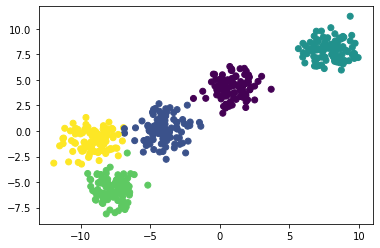

In [33]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [34]:
k=5
colors=["red","green","blue","orange","black"]
clusters={}
for kx in range(k):
    center=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        "center":center,
        "points":points,
        "color":colors[kx]
    }
    clusters[kx]=cluster

In [35]:
clusters

{0: {'center': array([-0.64643   , -5.19898339]),
  'points': [],
  'color': 'red'},
 1: {'center': array([-6.52065708, -2.95476059]),
  'points': [],
  'color': 'green'},
 2: {'center': array([1.56439967, 1.37315179]), 'points': [], 'color': 'blue'},
 3: {'center': array([ 7.66484813, -2.87559352]),
  'points': [],
  'color': 'orange'},
 4: {'center': array([ 5.39122145, -6.45421038]),
  'points': [],
  'color': 'black'}}

In [36]:
center=10*(2*np.random.random((x.shape[1],))-1)

In [37]:
print(center)

[-9.6310451   0.61378463]


In [38]:
#defining distance function
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [39]:
v1=np.array([1,2])
v2=np.array([3,5])
distance(v1,v2)

3.605551275463989

In [40]:
#implementing 2nd and 3rd step
#assign every data point to one of the clusters
def assignpointtoclusters(clusters):
    for ix in range(x.shape[0]):      #for all examples
        dist=[]
        current_x=x[ix]
        for kx in range(k):
            d=distance(current_x,clusters[kx]["center"])
            dist.append(d)
            #how do we choose the clusters
        current_cluster=np.argmin(dist)
        clusters[current_cluster]["points"].append(current_x)

In [41]:
def updateclusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0 :     # if the cluster center has been assigned some points
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[] # clearing the list
            
            
def plotclusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]["points"]))
        pts=np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except :
            pass
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
            

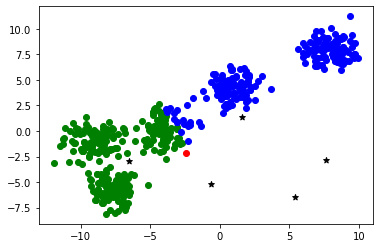

In [42]:
assignpointtoclusters(clusters)
plotclusters(clusters)

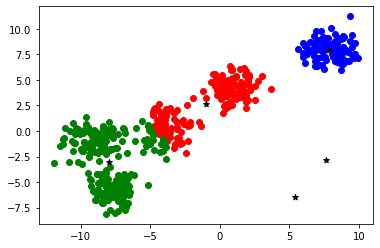

In [62]:

# Repeat this cell few times or put it inside a loop
assignpointtoclusters(clusters)
plotclusters(clusters)
updateclusters(clusters)